# EDA of self-generated secondary mushroom dataset

Let's get started...

<div style="text-align:center;">
  <img src="../images/happycodingshroom.webp" alt="Happy coding" style="width:300px;height:auto;">
</div>

source: [giphy.com](https://giphy.com/gifs/internet-computer-typing-7TcdtHOCxo3meUvPgj)

## Importing Libraries

In [1]:
import sys

# setting path
sys.path.append("../")
from src import data_cat, gen_corr_norm, mushroom_class_fix, stats_graphics, util_func

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
df = pd.read_csv("../data/secondary_data_generated_with_names.csv", sep=";")
df.head(5).T

,0,1,2,3,4
family,Amanita Family,Amanita Family,Amanita Family,Amanita Family,Amanita Family
name,Fly Agaric,Fly Agaric,Fly Agaric,Fly Agaric,Fly Agaric
class,p,p,p,p,p
cap-diameter,17.14,15.48,15.19,14.85,15.91
cap-shape,x,f,f,f,x
cap-surface,h,h,g,h,h
cap-color,o,e,o,e,e
does-bruise-or-bleed,f,f,f,f,f
gill-attachment,e,e,e,e,e
gill-spacing,NaN,NaN,NaN,NaN,NaN


New generated data is loaded from the file, but after generating, it is still sorted by `family`and `name` columns.
So before splitting the data into train, val and test sets, we need to shuffle the data.

In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(5).T

,0,1,2,3,4
family,Morel Family,Russula Family,Russula Family,Russula Family,Cortinarius Family
name,Common Morel,Bare-toothed Russula,Small Brown Milk Cap,Ugly Milk Cap,Straw-coloured Inocybe
class,e,e,p,p,p
cap-diameter,5.51,7.65,3.14,13.79,5.01
cap-shape,p,x,s,s,c
cap-surface,NaN,NaN,w,t,i
cap-color,n,n,o,n,y
does-bruise-or-bleed,f,f,t,t,f
gill-attachment,f,x,d,d,NaN
gill-spacing,f,c,c,c,c


Much better.

Let's see how much data we have.

In [5]:
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

Number of Samples: 61069
Number of Features: 23


In [6]:
df.dtypes

family                   object
name                     object
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

We see `cap-diameter`, `stem-height` and `stem-width` are numerical features.
All other features are  object type, but should be categorical, to be more memory efficient.

In [7]:
round(df.describe(), 3)

,cap-diameter,stem-height,stem-width
count,61069.000,61069.000,61069.000
mean,6.742,6.591,12.153
std,5.259,3.382,9.992
min,0.410,0.000,0.000
25%,3.490,4.640,5.200
50%,5.870,5.970,10.180
75%,8.540,7.750,16.570
max,61.500,33.060,100.710


In [8]:
df.nunique()

family                    23
name                     173
class                      2
cap-diameter            2587
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2238
stem-width              4616
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

### Missing Values

In [9]:
# check null values
df.isnull().sum()

family                      0
name                        0
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

We see a lot of missing values for `veil-type`, `spore-print-color`, `veil-color`, `stem-root`, `stem-surface` with more than half the values missing. For the first four features there is even more than 80% missing values.

`gill-spacing`, `cap-surface` and `gill-attachment` have 15% - 40% missing values.

`ring-type` has ca. 4% missing values.

Since we want a **simple model with few features** to predict the name of the mushroom, we will drop the features with missing values for our first round of modelling.

Other methods to handle missing values could be:
- imputation with mean, median or mode
- imputation with a constant value
- imputation with a value estimated by a model
- creating a new category for missing values
- looking for data in literature or other sources to fill in the missing values

In the [paper](../references/Mushroom%20data%20creation_sup.pdf) I used for generating data, the authors handled missing values for their generated data like this:

> **Second data curation** for correct data encoding. We handle missing values by using an imputation method, i.e., a threshold based filtering. Replacements using the most frequent single imputation is a strong simplification, however it is a common approach for missing imputation of nominal variables.

In [10]:
# drop columns with missing values
df_no_missing = df.dropna(axis=1, inplace=False)
df_no_missing = df_no_missing.drop(columns=["family"], inplace=False)
df_no_missing = df_no_missing.drop(columns=["class"], inplace=False)


In [11]:
print(
    f"Number of Features after dropping columns with missing values: {df_no_missing.shape[1]}"
)

Number of Features after dropping columns with missing values: 12


In [12]:
from src.mushroom_class_fix import get_variables_missing_dict

get_variables_missing_dict(df)

{'cap-surface': 0.23121387283236994,
 'gill-attachment': 0.16184971098265896,
 'gill-spacing': 0.41040462427745666,
 'stem-root': 0.8439306358381503,
 'stem-surface': 0.6242774566473989,
 'veil-type': 0.9479768786127167,
 'veil-color': 0.8786127167630058,
 'ring-type': 0.04046242774566474,
 'spore-print-color': 0.8959537572254336}

In [13]:
get_variables_missing_dict(df_no_missing)

{}

### Duplicate values

In [14]:
df_no_missing[df_no_missing.duplicated()].groupby("name").count()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
name,,,,,,,,,,,
Hairy Stereum,8,8,8,8,8,8,8,8,8,8,8
Orange Moss Agaric,1,1,1,1,1,1,1,1,1,1,1
Silver Leaf Fungus,94,94,94,94,94,94,94,94,94,94,94
Soft Slipper Toadstool,52,52,52,52,52,52,52,52,52,52,52


In [15]:
df_no_missing = df_no_missing.drop_duplicates()
df_no_missing.duplicated().sum()

0

## Feature importance analysis

### Target variable analysis

<Axes: xlabel='name', ylabel='Count'>

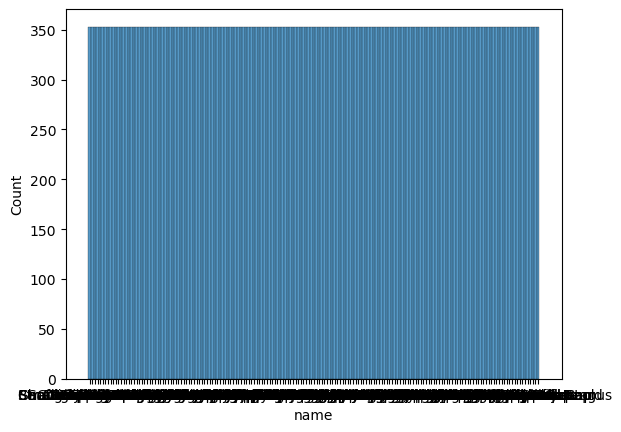

In [16]:
sns.histplot(df["name"])

In [17]:
# round(df.name.mean(), 3)

# FIXME: not working because of strings -> LabelEncoder

In [18]:
from src.mushroom_class_fix import encode_data_numerical


df_LE = encode_data_numerical(df_no_missing).copy()
df_LE.head(5).T

,0,1,2,3,4
name,35,3,128,154,138
cap-diameter,5.51,7.65,3.14,13.79,5.01
stem-height,4.53,7.49,4.02,4.85,5.95
stem-width,20.03,16.16,6.54,24.56,6.65
cap-shape_b,False,False,False,False,False
...,...,...,...,...,...
habitat_w,False,False,False,False,False
season_a,False,False,False,False,False
season_s,True,False,False,False,False
season_u,False,True,True,True,True


### Feature importance

In [19]:
# Correlation
corr = df_LE.corrwith(df_LE.name)
abs(corr).sort_values(ascending=False).head(15)
# (corr).sort_values(ascending=False)

name                      1.000000
does-bruise-or-bleed_t    0.155108
does-bruise-or-bleed_f    0.155108
cap-shape_p               0.128470
season_w                  0.122288
gill-color_y              0.120440
cap-color_k               0.119400
cap-color_y               0.112606
stem-color_o              0.100809
gill-color_g              0.096007
cap-color_u               0.090785
stem-color_b              0.086764
stem-width                0.078830
cap-diameter              0.077313
cap-shape_s               0.077223
dtype: float64

<Axes: >

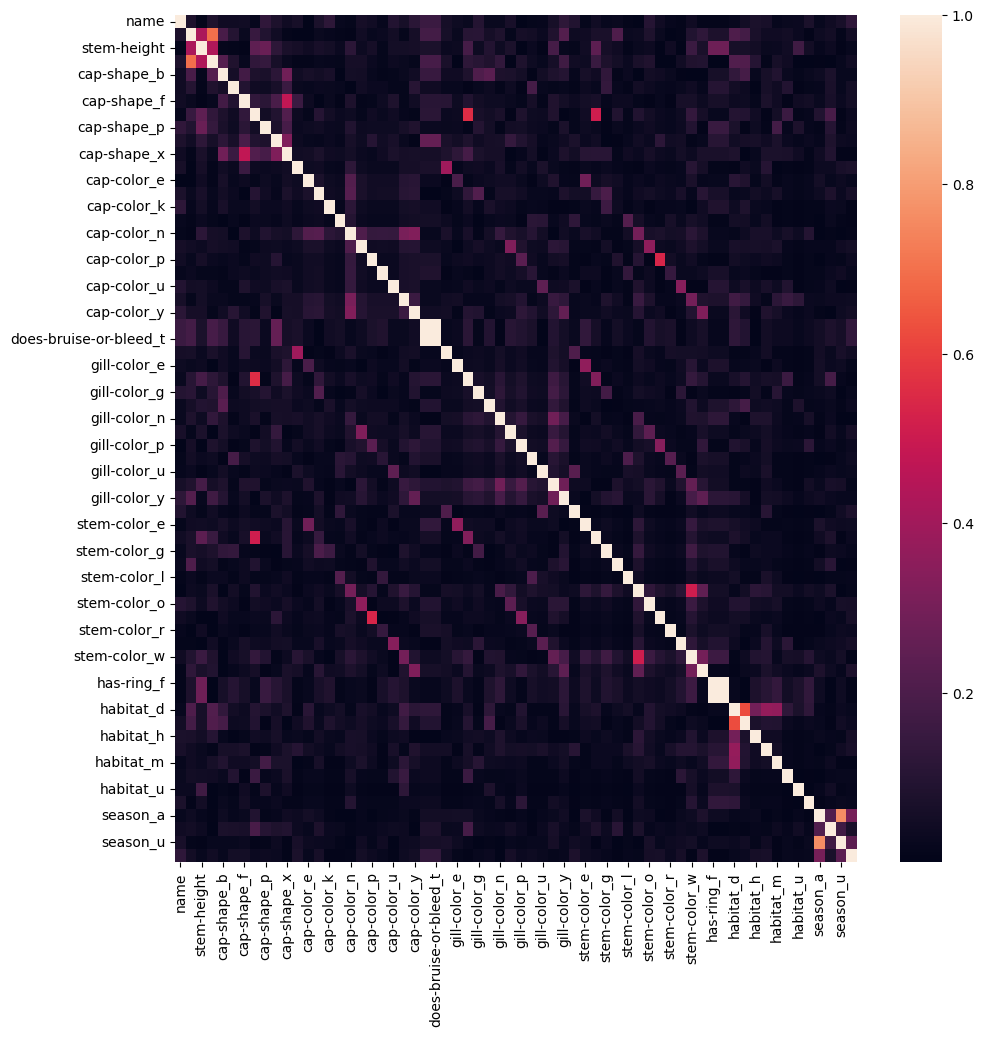

In [20]:
plt.figure(figsize=(11, 11))
sns.heatmap(abs(df_LE.corr()), fmt=".2f", annot=False)

In [21]:
cat_features = [
    #    "family",
    #    "class",
    "cap-shape",
    "cap-color",
    "does-bruise-or-bleed",
    "gill-color",
    "stem-color",
    "has-ring",
    "habitat",
    "season",
]
cat_features

['cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-color',
 'stem-color',
 'has-ring',
 'habitat',
 'season']

In [22]:
num_features = [
    "cap-diameter",
    "stem-height",
    "stem-width",
]
num_features

['cap-diameter', 'stem-height', 'stem-width']

In [23]:
df_no_missing[cat_features].nunique()

cap-shape                7
cap-color               12
does-bruise-or-bleed     2
gill-color              12
stem-color              13
has-ring                 2
habitat                  8
season                   4
dtype: int64

In [24]:
# female_mean = df[df.sex == 0].output.mean()
# female_mean
# # Output: 0.75
# male_mean = df[df.sex == 1].output.mean()
# male_mean
# # Output: 0.45

season_w_mean = df_LE[df_LE.season_w == 0].name.mean()
season_w_mean

87.78834885142179

In [25]:
season_u_mean = df_LE[df_LE.season_u == 0].name.mean()
season_u_mean

83.37450042069835

In [26]:
df_no_missing.season.value_counts()

season
a    30015
u    22882
w     5280
s     2737
Name: count, dtype: int64

In [27]:
df_LE.columns

Index(['name', 'cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p',
       'cap-shape_s', 'cap-shape_x', 'cap-color_b', 'cap-color_e',
       'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n',
       'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f',
       'does-bruise-or-bleed_t', 'gill-color_b', 'gill-color_e',
       'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e',
       'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l',
       'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_r',
       'stem-color_u', 'stem-color_w', 'stem-color_y', 'has-ring_f',
       'has-ring_t', 'habitat_d', 'habitat_g', 'habitat_h', 'habitat_l',
       'habitat_m', 'habitat_p',

## FIXME: Stuff missing

## Test-Train-Validation Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df_full_train, df_test = train_test_split(
    df_no_missing, test_size=0.2, random_state=42, stratify=df_no_missing["name"]
)

In [30]:
len(df_full_train), len(df_test)

(48731, 12183)

In [31]:
df_train, df_val = train_test_split(
    df_full_train, test_size=0.25, random_state=42, stratify=df_full_train.name
)

In [32]:
len(df_train), len(df_val), len(df_test)

(36548, 12183, 12183)

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
df_train

,name,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,Tubed Chanterelle,3.31,s,n,f,f,6.21,7.20,y,f,d,a
1,Red-staining Inocybe,3.78,c,w,t,r,5.16,11.76,w,f,g,u
2,Destroying Angel,7.79,b,w,f,w,12.44,12.96,w,t,d,u
3,Orange-red Wax Cap,2.73,f,o,f,y,3.36,5.59,y,f,h,a
4,Birch Russula,4.73,f,b,f,w,5.71,6.79,w,f,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...
36543,The Charcoal Burner,12.19,x,y,f,w,7.58,20.30,w,f,d,a
36544,Peppery Bolete,4.26,x,o,f,n,4.88,9.45,e,f,d,u
36545,Brown Birch Bolete,6.57,x,g,t,g,11.31,25.14,w,f,d,a
36546,Common Funnel Cap,6.07,s,n,f,w,6.22,8.12,w,f,d,u


In [35]:
y_train = (df_train.name).values
y_val = (df_val.name).values

In [36]:
del df_train["name"]
del df_val["name"]
del df_test["name"]

## One-Hot Encoding

In [37]:
from sklearn.feature_extraction import DictVectorizer

In [38]:
dv = DictVectorizer(sparse=False)

# Convert categorical features to dictionary format
train_dicts = df_train[cat_features + num_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [39]:
dv.get_feature_names_out()

array(['cap-color=b', 'cap-color=e', 'cap-color=g', 'cap-color=k',
       'cap-color=l', 'cap-color=n', 'cap-color=o', 'cap-color=p',
       'cap-color=r', 'cap-color=u', 'cap-color=w', 'cap-color=y',
       'cap-diameter', 'cap-shape=b', 'cap-shape=c', 'cap-shape=f',
       'cap-shape=o', 'cap-shape=p', 'cap-shape=s', 'cap-shape=x',
       'does-bruise-or-bleed=f', 'does-bruise-or-bleed=t', 'gill-color=b',
       'gill-color=e', 'gill-color=f', 'gill-color=g', 'gill-color=k',
       'gill-color=n', 'gill-color=o', 'gill-color=p', 'gill-color=r',
       'gill-color=u', 'gill-color=w', 'gill-color=y', 'habitat=d',
       'habitat=g', 'habitat=h', 'habitat=l', 'habitat=m', 'habitat=p',
       'habitat=u', 'habitat=w', 'has-ring=f', 'has-ring=t', 'season=a',
       'season=s', 'season=u', 'season=w', 'stem-color=b', 'stem-color=e',
       'stem-color=f', 'stem-color=g', 'stem-color=k', 'stem-color=l',
       'stem-color=n', 'stem-color=o', 'stem-color=p', 'stem-color=r',
       'stem-colo

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model_1 = LogisticRegression(solver="liblinear", random_state=1)
LogisticRegression_model_1.fit(X_train, y_train)

val_dict = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dict)

# y_pred = LogisticRegression_model_1.predict_proba(X_val)[:,1]
y_pred = LogisticRegression_model_1.predict_proba(X_val)
y_pred

array([[3.77154249e-04, 8.31135924e-06, 1.71202533e-04, ...,
        3.98835483e-07, 9.07613041e-05, 1.05976638e-06],
       [2.19990354e-13, 6.09359806e-09, 3.23413946e-08, ...,
        3.28613783e-08, 6.14644893e-07, 1.14346685e-26],
       [1.57010369e-07, 5.01201280e-05, 6.01544388e-06, ...,
        1.81074355e-05, 4.20729543e-08, 4.90056673e-15],
       ...,
       [6.37991183e-07, 7.21634898e-03, 2.79655209e-07, ...,
        9.20415831e-07, 5.67681126e-03, 1.03953518e-15],
       [2.68652416e-06, 1.36995312e-05, 7.36045261e-04, ...,
        8.96936581e-05, 1.16907964e-08, 1.18064811e-08],
       [7.83769319e-11, 4.70285769e-08, 8.48957713e-07, ...,
        2.71445793e-07, 2.28816357e-09, 2.28108772e-22]])

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Performance of LogisticRegression_model_1:

# Convert predicted probabilities to predicted labels
y_pred_labels = LogisticRegression_model_1.predict(X_val)
probabilities = LogisticRegression_model_1.predict_proba(X_val)

acc_LogisticRegression_model_1 = round(accuracy_score(y_val, y_pred_labels), 5)
print("acc:  ", acc_LogisticRegression_model_1)
# Output: 0.0

roc_LogisticRegression_model_1 = round(
    roc_auc_score(y_val, probabilities, multi_class="ovr"), 5
)
print("roc:  ", roc_LogisticRegression_model_1)
# Output: 0.99995

acc:   0.97669
roc:   0.99995


In [42]:
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.metrics import accuracy_score

# # First, get predicted classes using argmax (as you did before)
# y_pred_labels = LogisticRegression_model_1.predict(X_val)

# # Convert to the same format if needed
# mlb = MultiLabelBinarizer()
# y_val_encoded = mlb.fit_transform(y_val.reshape(-1, 1))
# y_pred_encoded = mlb.transform(y_pred_labels.reshape(-1, 1))

# # Calculate accuracy
# acc = accuracy_score(y_val_encoded, y_pred_encoded)
# acc

In [43]:
# from sklearn.preprocessing import MultiLabelBinarizer

# # Convert labels to proper format first
# mlb = MultiLabelBinarizer()
# y_val_binary = mlb.fit_transform(y_val)
# y_pred_binary = y_pred >= t

# # Now you can use accuracy_score
# acc = accuracy_score(y_val_binary, y_pred_binary)


In [44]:
# thresholds = np.linspace(0, 1, 21)
# accuricies = []


# for t in thresholds:
#     acc = accuracy_score(y_val, y_pred >= t)
#     accuricies.append(acc)

# plt.plot(thresholds, accuricies)

In [45]:
# # Get probabilities per class
# thresholds = np.linspace(0, 1, 21)
# n_classes = y_pred.shape[1]

# # For each class
# for class_idx in range(n_classes):
#     class_scores = y_pred[:, class_idx]
#     # Convert true labels to binary for this class
#     y_true_binary = (y_val == class_idx).astype(int)

#     # Calculate metrics for different thresholds
#     for t in thresholds:
#         y_pred_binary = (class_scores >= t).astype(int)
#         # Calculate your metric (accuracy, f1, etc.)


In [46]:
# from sklearn.metrics import roc_curve

# # For each class
# for class_idx in range(n_classes):
#     fpr, tpr, thresholds = roc_curve(
#         (y_val == class_idx).astype(int), y_pred[:, class_idx]
#     )
#     # Find optimal threshold using Youden's J statistic
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]


In [47]:
from collections import Counter

print("Label distribution:", Counter(y_val))

Label distribution: Counter({'Stinking Parasol': 71, 'Dotted-stemmed Bolete': 71, 'Meadow Wax Cap': 71, 'Hay Cap': 71, 'Tufted Bell Cap': 71, 'Wood Blewit': 71, 'Parasol Mushroom': 71, 'Changeable Melanoleuca': 71, 'Tubed Chanterelle': 71, 'Red-cracked Bolete': 71, 'Oyster Mushroom': 71, 'Bare-toothed Russula': 71, 'Larch Bolete': 71, 'The Charcoal Burner': 71, 'Brown Goblet': 71, 'Ivory Clitocybe': 71, 'Destroying Angel': 71, 'The Miller': 71, 'Horse Mushroom': 71, 'Livid Entoloma': 71, 'Blackening Wax Cap': 71, 'Peppery Bolete': 71, 'Striated Nolanea': 71, 'Yellow-cracked Bolete': 71, 'Hedgehog Fungus': 71, 'Blood-red Cortinarius': 71, 'Greasy Tough Shank': 71, 'The Deceiver': 71, 'Velvet Shank': 71, 'Slippery Jack': 71, 'Oak Milk Cap': 71, 'Slimy Milk Cap': 71, 'Porcelain Mushroom': 71, 'Birch Russula': 71, 'Rusty Carpet Ink Cap': 71, 'The Sickener': 71, 'Plums and custard': 71, 'Sulphur Tricholoma': 71, 'Ear-pick Fungus': 71, 'False Panther Cap': 71, 'Aniseed Funnel Cap': 71, 'Luri

In [48]:
# from sklearn.preprocessing import label_binarize

# # Binarize the labels
# classes = np.unique(y_val)
# y_val_bin = label_binarize(y_val, classes=classes)

# # Calculate ROC curve for each class
# for i in range(len(classes)):
#     fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_pred[:, i])
#     roc_auc = auc(fpr, tpr)

# # plot ROC curve
# plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)


## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dv = DictVectorizer(sparse=True)

train_dict = df_train[cat_features + num_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dict)

dt_1 = DecisionTreeClassifier(
    #    criterion="entropy",
    #    splitter="best",
    max_depth=3,
    #    min_samples_split=2,
    #    min_samples_leaf=1,
    #    min_weight_fraction_leaf=0.0,
    #    max_features=None,
    random_state=42,
    #    max_leaf_nodes=None,
    #    min_impurity_decrease=0.0,
    #    class_weight=None,
    #    ccp_alpha=0.0,
)

dt_1.fit(X_train, y_train)
y_pred = dt_1.predict_proba(X_val)[:, 1]

In [50]:
# score = y_pred >= 0.5
predicted_labels = dt_1.predict(X_val)
acc_DecisionTree_model_1 = round(accuracy_score(y_val, predicted_labels), 5)
print("acc:  ", acc_DecisionTree_model_1)

acc:   0.02306


??? Why? I don`t understand ATM

In [51]:
y_pred = dt_1.predict_proba(X_val)
roc_DecisionTree_model_1 = round(roc_auc_score(y_val, y_pred, multi_class="ovr"), 5)
print("roc:  ", roc_DecisionTree_model_1)

roc:   0.6538


In [52]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt_2 = DecisionTreeClassifier(max_depth=depth)

    dt_2.fit(X_train, y_train)
    y_pred = dt_2.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred, multi_class="ovr")

    print("%4s -> %.3f" % (depth, auc))


   1 -> 0.506
   2 -> 0.511
   3 -> 0.654
   4 -> 0.777
   5 -> 0.805
   6 -> 0.813
  10 -> 0.943
  15 -> 0.986
  20 -> 0.992
None -> 0.990


In [53]:
for depth in [5, 10, 15]:
    print("depth: %s" % depth)
    for min_samples in [1, 5, 10, 15, 20, 50, 100]:
        dt_2 = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples)

        dt_2.fit(X_train, y_train)
        y_pred = dt_2.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class="ovr")

        print("%4s -> %.3f" % (min_samples, auc))


depth: 5
   1 -> 0.805
   5 -> 0.805
  10 -> 0.805
  15 -> 0.805
  20 -> 0.805
  50 -> 0.805
 100 -> 0.805
depth: 10
   1 -> 0.943
   5 -> 0.943
  10 -> 0.943
  15 -> 0.943
  20 -> 0.943
  50 -> 0.943
 100 -> 0.943
depth: 15
   1 -> 0.986
   5 -> 0.987
  10 -> 0.986
  15 -> 0.986
  20 -> 0.986
  50 -> 0.987
 100 -> 0.987


Doesn't change anything.

In [54]:
dt_3 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

dt_3.fit(X_train, y_train)

y_pred = dt_3.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred, multi_class="ovr")
auc

0.9428648499682818

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

dv = DictVectorizer(sparse=True)

train_dict = df_train[cat_features + num_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dict)

rf_1 = RandomForestClassifier(
    n_estimators=3,
    #    criterion="gini",
    #    max_depth=None,
    #    min_samples_split=2,
    #    min_samples_leaf=1,
    #    min_weight_fraction_leaf=0.0,
    #    max_features="auto",
    #    max_leaf_nodes=None,
    #    min_impurity_decrease=0.0,
    #    bootstrap=True,
    #    oob_score=False,
    n_jobs=-1,
    random_state=42,
    #    verbose=0,
    #    warm_start=False,
    #    class_weight=None,
    #    ccp_alpha=0.0,
    #    max_samples=None,
)

rf_1.fit(X_train, y_train)

y_pred = rf_1.predict_proba(X_val)

In [56]:
# score = y_pred >= 0.5

# acc_RandomForest_model_1 = round(accuracy_score(y_val, y_pred), 5)
# print("acc:  ", acc_RandomForest_model_1)

In [57]:
roc_RandomForest_model_1 = round(roc_auc_score(y_val, y_pred, multi_class="ovr"), 5)
print("roc:  ", roc_RandomForest_model_1)

roc:   0.99776


depth: 1
10 -> 0.761
20 -> 0.914
30 -> 0.967
40 -> 0.975
50 -> 0.982
60 -> 0.982
70 -> 0.984
80 -> 0.985
90 -> 0.985
100 -> 0.986
110 -> 0.986
120 -> 0.986
130 -> 0.986
140 -> 0.989
150 -> 0.992

depth: 3
10 -> 0.969
20 -> 0.985
30 -> 0.990
40 -> 0.991
50 -> 0.993
60 -> 0.994
70 -> 0.994
80 -> 0.995
90 -> 0.995
100 -> 0.995
110 -> 0.995
120 -> 0.995
130 -> 0.995
140 -> 0.996
150 -> 0.996

depth: 5
10 -> 0.989
20 -> 0.995
30 -> 0.997
40 -> 0.997
50 -> 0.998
60 -> 0.997
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.999
140 -> 0.999
150 -> 0.999

depth: 10
10 -> 0.999
20 -> 1.000
30 -> 1.000
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000



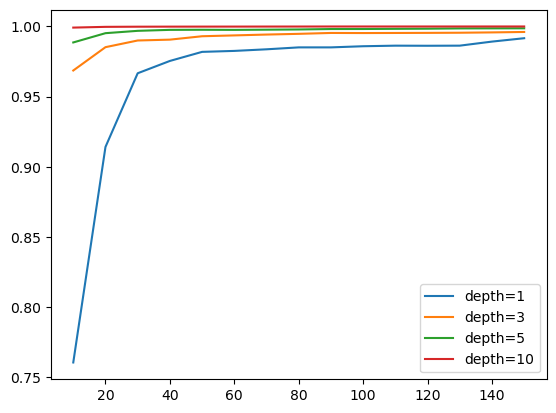

In [58]:
auc_scores = {}

for depth in [1, 3, 5, 10]:
    print("depth: %s" % depth)
    aucs = []

    for i in range(10, 151, 10):
        rf = RandomForestClassifier(
            n_estimators=i, max_depth=depth, random_state=1, n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class="ovr")
        print("%s -> %.3f" % (i, auc))
        aucs.append(auc)

    auc_scores[depth] = aucs
    print()

num_trees = list(range(10, 151, 10))
plt.plot(num_trees, auc_scores[1], label="depth=1")
plt.plot(num_trees, auc_scores[3], label="depth=3")
plt.plot(num_trees, auc_scores[5], label="depth=5")
plt.plot(num_trees, auc_scores[10], label="depth=10")
plt.legend()

min_samples: 3
10 -> 0.989
20 -> 0.995
30 -> 0.997
40 -> 0.997
50 -> 0.997
60 -> 0.997
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.999
140 -> 0.999
150 -> 0.999

min_samples: 5
10 -> 0.989
20 -> 0.994
30 -> 0.997
40 -> 0.997
50 -> 0.997
60 -> 0.997
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.998
140 -> 0.999
150 -> 0.999

min_samples: 10
10 -> 0.988
20 -> 0.994
30 -> 0.997
40 -> 0.997
50 -> 0.997
60 -> 0.997
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.999
140 -> 0.999
150 -> 0.999



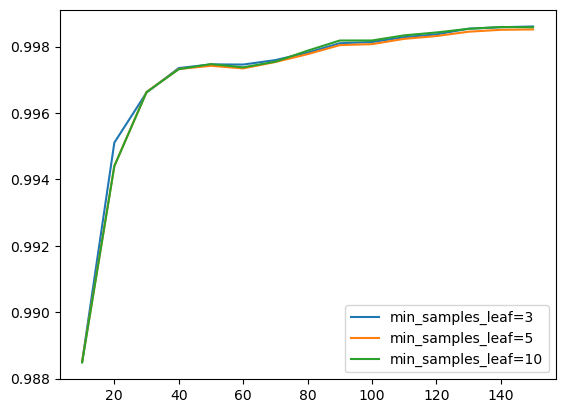

In [59]:
auc_scores = {}

for min_samples in [3, 5, 10]:
    print("min_samples: %s" % min_samples)
    aucs = []

    for i in range(10, 151, 10):
        rf = RandomForestClassifier(
            n_estimators=i,
            max_depth=5,
            min_samples_leaf=min_samples,
            random_state=1,
            n_jobs=-1,
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class="ovr")
        print("%s -> %.3f" % (i, auc))
        aucs.append(auc)

    auc_scores[min_samples] = aucs
    print()

num_trees = list(range(10, 151, 10))
plt.plot(num_trees, auc_scores[3], label="min_samples_leaf=3")
plt.plot(num_trees, auc_scores[5], label="min_samples_leaf=5")
plt.plot(num_trees, auc_scores[10], label="min_samples_leaf=10")
plt.legend()


Does not make any difference.

### Best model

## XGBoost

## from scripts

In [60]:
X_train, X_test, y_train, y_test, model, y_prob, y_pred = mushroom_class_fix.classify_data(
        df_no_missing, mode="lda", encode=True, impute=False
    )

In [61]:
mushroom_class_fix.get_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[55.  9.]
 [ 0. 57.]]


array([[55.,  9.],
       [ 0., 57.]])

In [62]:
# mushroom_class_fix.get_evaluation_scores_dict(y_test, y_pred, average="micro")

In [63]:
model = mushroom_class_fix.train_model(X_train, y_train, mode="log_reg")

In [64]:
y_prob, y_pred = mushroom_class_fix.get_y_prob_pred(X_test, model)

In [65]:
print("Conf.-Mat.: " + str(mushroom_class_fix.get_confusion_matrix(y_test, y_pred)))


Confusion Matrix:
[[64.  0.]
 [ 0. 57.]]
Conf.-Mat.: [[64.  0.]
 [ 0. 57.]]


In [66]:
mushroom_class_fix.get_evaluation_scores_dict(y_test, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].